
### Model 

- Decision Tree

- ensemble learning
    - Random Forest: ensemble.RandomForestClassiﬁer (Bagging)
    - Adaboost: ensemble.AdaBoostClassiﬁer (Boosting)
    - Xgboost
    - GBDT: ensemble.GradientBoostingClassiﬁer (Boosting)

### ensemble learning
- ensemble estimator 
- Bagging
- Boosting
- stacking


### Reference

[ scikit-learn: Ensemble methods ](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

# Import Package
#### Using the Red wine data set 

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_wine

%matplotlib inline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import numpy as np

In [7]:
wine = load_wine()
print(wine.data)
print(wine.target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Model

In [9]:
# train test split 
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target,test_size=0.3)

# Model 
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)


dtc = dtc.fit(X_train,Y_train)
rfc = rfc.fit(X_train,Y_train)

score_dt = dtc.score(X_test,Y_test)
score_rf = rfc.score(X_test,Y_test)

print("Sigle Tree:{}".format(score_dt)) 
print("Random Forest:{}".format(score_rf))

Sigle Tree:0.8888888888888888
Random Forest:0.9814814814814815


# Cross Validation

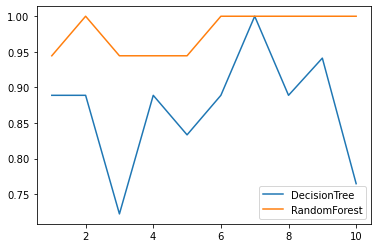

In [13]:
# Cross validation

dtc = DecisionTreeClassifier()
dtc_s = cross_val_score(dtc, wine.data, wine.target, cv=10)

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)


plt.plot(range(1,11),dtc_s,label="DecisionTree")
plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.legend()
plt.show()

# Average Cross Validation

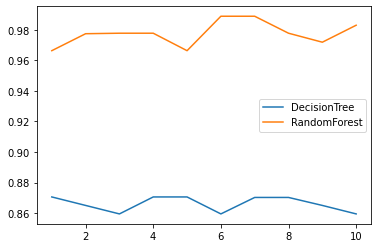

In [17]:
# 10-times cross validation
dtc_lst = []
rfc_lst = []

for i in range(10):
    # Decision Tree
    dtc = DecisionTreeClassifier()
    dtc_s = cross_val_score(dtc, wine.data, wine.target, cv=10).mean()
    dtc_lst.append(dtc_s)
    
    # Random Forest
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_lst.append(rfc_s)
    
plt.plot(range(1,11), dtc_lst,label="DecisionTree")
plt.plot(range(1,11), rfc_lst,label="RandomForest")
plt.legend()
plt.show()

# Brute force for N-estimators

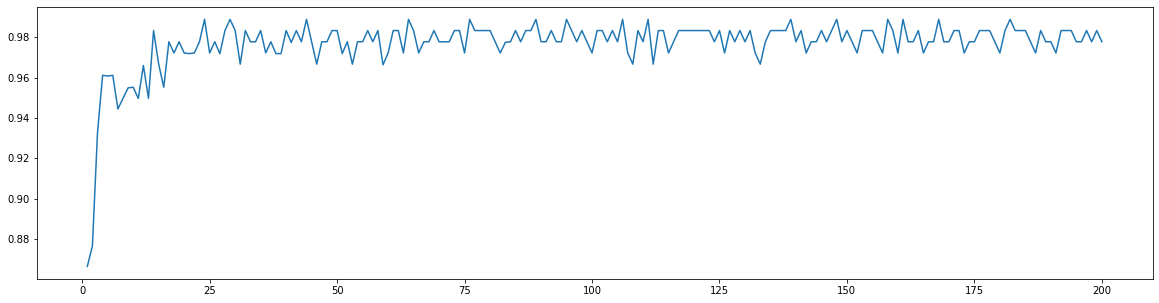

In [19]:
# Brute force for N-estimators with cross validation

result_lst = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    result_lst.append(rfc_s)

plt.figure(figsize=[20,5])
plt.plot(range(1,201),result_lst)
plt.show()

In [20]:
# fetch the maximum value of average cross-validation and its index
print(max(result_lst), result_lst.index(max(result_lst)))

0.9888888888888889 23


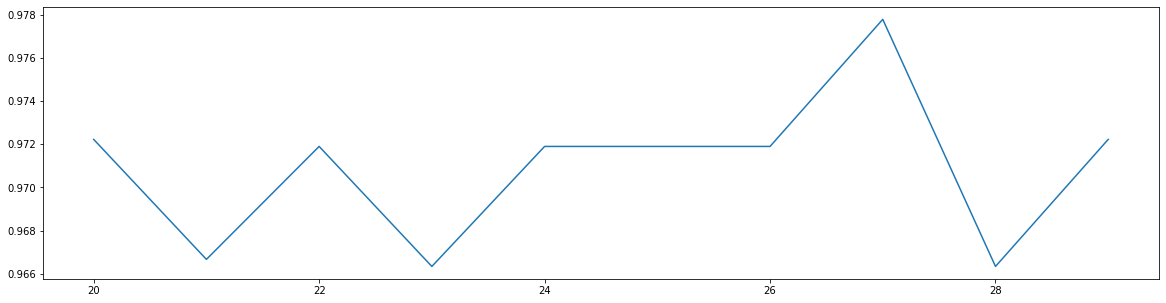

In [39]:
# Brute force for N-estimators with cross validation
# Further refine the learning curve within a defined range

result_lst = []
for i in range(20,30):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state = 42)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    result_lst.append(rfc_s)

plt.figure(figsize=[20,5])
plt.plot(range(20,30), result_lst)
plt.show()

In [42]:
# fetch the maximum value of average cross-validation and its index
print(max(result_lst), result_lst.index(max(result_lst))+ 20 )

0.9777777777777779 27


# GridSearchCV: Adjust max_depth

In [60]:
param_grid = {
    'max_depth':np.arange(1,20,1)
}

rfc = RandomForestClassifier( n_estimators=27 ,random_state = 90)

gs = GridSearchCV(
                estimator=rfc, 
                param_grid=param_grid, 
                cv=10 )
gs.fit( wine.data, wine.target )

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 6}
0.9833333333333332


# Model Evaluation with best fit estimator

In [63]:
rfc = RandomForestClassifier(n_estimators=27, max_depth=6, n_jobs=-1)
rfc = rfc.fit(X_train,Y_train)

In [69]:
out = rfc.predict(X_test) 
print(metrics.classification_report(Y_test, out))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [54]:
rfc.feature_importances_ # The impurity-based feature importances.

array([0.12330162, 0.07507774, 0.01717471, 0.03696039, 0.05106882,
       0.07489931, 0.16449979, 0.0160461 , 0.02817401, 0.14331388,
       0.08051955, 0.08561314, 0.10335096])

In [55]:
rfc.apply(X_test) # Apply trees in the forest to X, return leaf indices.

array([[ 7,  5,  4, ...,  7,  2,  2],
       [16, 16, 12, ..., 17, 18,  9],
       [12, 11,  7, ...,  9,  2,  2],
       ...,
       [ 7,  5,  4, ..., 19,  9,  4],
       [13, 16, 10, ..., 19, 18, 18],
       [ 7,  5,  4, ..., 19,  9,  4]])

In [56]:
rfc.predict(X_test) # Predict class for sample X

array([1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 2])

In [57]:
rfc.predict_proba(X_test) # Predict class probabilities for sample X

array([[0.        , 0.62962963, 0.37037037],
       [1.        , 0.        , 0.        ],
       [0.07407407, 0.81481481, 0.11111111],
       [0.        , 0.        , 1.        ],
       [0.85185185, 0.14814815, 0.        ],
       [0.77777778, 0.18518519, 0.03703704],
       [0.22222222, 0.62962963, 0.14814815],
       [0.        , 0.92592593, 0.07407407],
       [0.07407407, 0.92592593, 0.        ],
       [0.11111111, 0.85185185, 0.03703704],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.85185185, 0.14814815, 0.        ],
       [0.62962963, 0.37037037, 0.        ],
       [0.07407407, 0.25925926, 0.66666667],
       [0.92592593, 0.07407407, 0.        ],
       [0.18518519, 0.81481481, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.11111111, 0.85185185, 0.03703704],
       [0.        , 1.        , 0.        ],
       [0.